# Descripcion
Papemill es un paquete de python que permito reproducir de manera automátia jupyer notebooks.  Solo se necesita especificar una serie de parametros.  Se crea un jupyter notebook "plantilla", el cual se corre una vez, y luego desde la terminal, un codigo python, u otro jupyter notebook se corre la herramienta, y se genera un nuevo fichero jupyter notebook por parametro sobre le cual hayamos querido iterar.  Aquí usaremos la opción del jupyter notebook, e iteraremos sobre el año en que tenemos datos de satélite de temperatura (como en los tutoriales anterirores).

Pueden leer más sobre esta herramienta aquí:
* https://papermill.readthedocs.io/en/latest/ 
* https://papermill.readthedocs.io/en/latest/usage-execute.html 
* https://medium.com/y-data-stories/automating-jupyter-notebooks-with-papermill-4b8543ece92f 

# Parametros:

In [1]:
fecha = '1965-01-01'

In [2]:
# Parameters
fecha = "1969-01-01"


In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import matplotlib
import matplotlib.gridspec as gridspec
import numpy as np
import glob
from collections import Counter
from netCDF4 import Dataset

import cmocean as cmo



In [4]:
fichero = '../../../shared-readwrite/ERA5/ERA5_Coarse.nc' ## 


In [5]:
fileobj = xr.open_dataset(fichero) # importando el archivo
sst = fileobj['sst'][:] # Leyendo las variables del archivo, como dijimos, un nombre auto-explicativo
sst = sst - 273.15 # convertiendo a Celsius de Kelvin

## Seleccionamos los datos de la fecha especificada:

In [6]:
sst_sel = sst.sel(time=fecha); # El ";" es para que no se muestren los outputs de esta función


## Graficamos los valores de temperatura para ese día:

In [7]:
cmap = cmo.cm.thermal


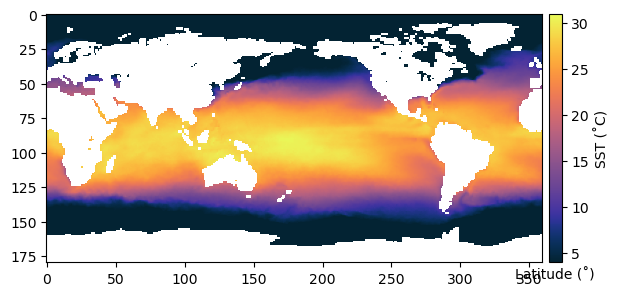

In [8]:
fig, ax = plt.subplots()
image = plt.imshow(sst_sel,cmap=cmap,
                  vmin=4,vmax=31)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])
cbar= plt.colorbar(image, cax=cax)

plt.xlabel('Longitude (˚)')
plt.xlabel('Latitude (˚)')
cbar.set_label('SST (˚C)') 
plt.show()

## Calculamos y visualizamos ahora la anomalía de SST para el día:

### Para ello primero quitamos la media de todos los años:

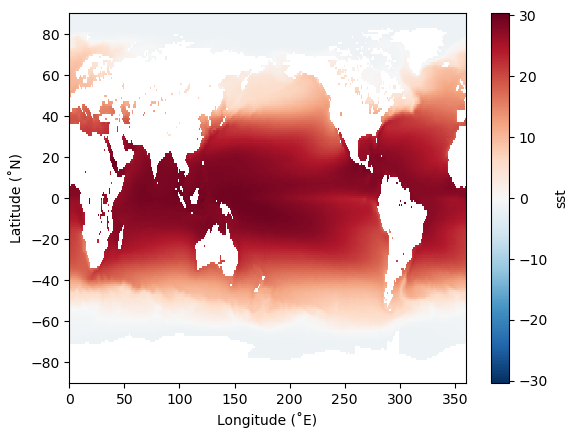

In [9]:
fig, ax = plt.subplots()
sst.mean(dim='time').plot()

plt.xlabel('Longitude (˚E)')
plt.ylabel('Latitude (˚N)')
plt.show()


In [10]:
print('La anomalía de SST en el día ' + fecha + ' fue:')

La anomalía de SST en el día 1969-01-01 fue:


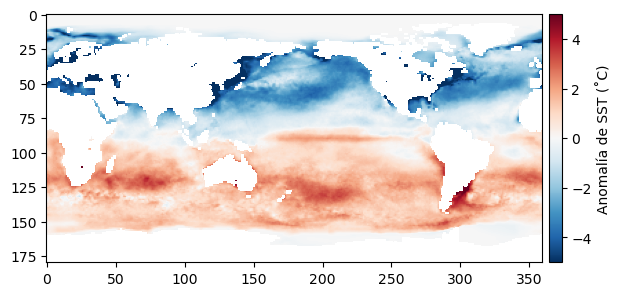

In [11]:
fig, ax = plt.subplots()
image = plt.imshow(sst_sel - sst.mean(dim='time'), cmap='RdBu_r'
                  , vmin=-5, vmax=5)

cax = fig.add_axes([ax.get_position().x1+0.01,
                    ax.get_position().y0,0.02,
                    ax.get_position().height])

cbar= plt.colorbar(image, cax=cax)
cbar.set_label('Anomalía de SST (˚C)') 
plt.show()